In [1]:
import pandas as pd

In [2]:
pref = pd.read_csv("COVID-19-jp/nhk_news_covid19_prefectures_daily_data.csv")
pref["日付"] = pd.to_datetime(pref["日付"] )
print(len(pref))
pref.tail()

23124


,日付,都道府県コード,都道府県名,各地の感染者数_1日ごとの発表数,各地の感染者数_累計,各地の死者数_1日ごとの発表数,各地の死者数_累計
23119,2021-05-17,47,沖縄県,59,13918,1,142
23120,2021-05-18,47,沖縄県,168,14086,4,146
23121,2021-05-19,47,沖縄県,203,14289,0,146
23122,2021-05-20,47,沖縄県,198,14487,1,147
23123,2021-05-21,47,沖縄県,207,14694,1,148


In [3]:
all_jp = pref.groupby(["都道府県名"], as_index=False).sum()
del all_jp["各地の感染者数_累計"]
del all_jp["各地の死者数_累計"]
#all_jp = all_jp.rename(columns={"各地の感染者数合計":"各地の感染者数_1日ごとの発表数"})
all_jp = all_jp.rename(columns={"各地の感染者数_1日ごとの発表数":"各地の感染者数合計"})
all_jp = all_jp.rename(columns={"各地の死者数_1日ごとの発表数":"各地の死者数合計"})
all_jp.tail()

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計
42,静岡県,10824,7782,132
43,香川県,18204,1900,24
44,高知県,19188,1215,20
45,鳥取県,15252,446,2
46,鹿児島県,22632,3072,28


## 都道府県ごとの最新データを付与

In [4]:
# 直近１週間の感染者数
pref["直近1週間の感染者数"] = pref["各地の感染者数_1日ごとの発表数"].rolling(7).sum()
pref.tail(7)

,日付,都道府県コード,都道府県名,各地の感染者数_1日ごとの発表数,各地の感染者数_累計,各地の死者数_1日ごとの発表数,各地の死者数_累計,直近1週間の感染者数
23117,2021-05-15,47,沖縄県,160,13781,1,141,800.0
23118,2021-05-16,47,沖縄県,78,13859,0,141,775.0
23119,2021-05-17,47,沖縄県,59,13918,1,142,798.0
23120,2021-05-18,47,沖縄県,168,14086,4,146,834.0
23121,2021-05-19,47,沖縄県,203,14289,0,146,928.0
23122,2021-05-20,47,沖縄県,198,14487,1,147,1000.0
23123,2021-05-21,47,沖縄県,207,14694,1,148,1073.0


### 感染者数前日比

In [5]:
import numpy as np
pref["新規感染者数前日比"] = pref["各地の感染者数_1日ごとの発表数"].pct_change()
# 一番古い日付だけNANを設定
pref.loc[pref["日付"]==pref["日付"].min(),"新規感染者数前日比"] = np.nan
pref["直近1週間の新規感染者数前日比平均"] = pref["新規感染者数前日比"].rolling(7).mean()
pref.tail()

,日付,都道府県コード,都道府県名,各地の感染者数_1日ごとの発表数,各地の感染者数_累計,各地の死者数_1日ごとの発表数,各地の死者数_累計,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均
23119,2021-05-17,47,沖縄県,59,13918,1,142,798.0,-0.243590,0.307117
23120,2021-05-18,47,沖縄県,168,14086,4,146,834.0,1.847458,0.190087
23121,2021-05-19,47,沖縄県,203,14289,0,146,928.0,0.208333,0.244741
23122,2021-05-20,47,沖縄県,198,14487,1,147,1000.0,-0.024631,0.218942
23123,2021-05-21,47,沖縄県,207,14694,1,148,1073.0,0.045455,0.216365


In [6]:
latest = pref.loc[pref["日付"]==pref["日付"].max()][["都道府県名","直近1週間の感染者数","新規感染者数前日比","直近1週間の新規感染者数前日比平均"]]
latest.head()

,都道府県名,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均
491,北海道,3973.0,0.067548,0.048582
983,青森県,202.0,-0.560606,0.293312
1475,岩手県,135.0,-0.480000,-0.034941
1967,宮城県,208.0,0.035714,-0.006711
2459,秋田県,64.0,-0.333333,0.303849


In [7]:
all_jp = pd.merge(all_jp, latest, on="都道府県名")
all_jp.head()

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均
0,三重県,11808,4656,101,295.0,0.083333,0.006145
1,京都府,12792,15256,200,859.0,-0.133858,-0.043927
2,佐賀県,20172,2378,18,208.0,0.714286,0.059163
3,兵庫県,13776,38528,1073,1545.0,-0.221154,-0.003139
4,北海道,492,33318,985,3973.0,0.067548,0.048582


## 人口データを付与

In [8]:
pop = pd.read_excel("COVID-19-jp/2001stjin.xls",header=3)[["Unnamed: 1","計"]]
pop.rename(columns={"Unnamed: 1":"都道府県名"},inplace=True)
pop.rename(columns={"計":"人口"},inplace=True)
pop = pop.loc[pop["都道府県名"]!="合計"].reset_index(drop=True)

In [9]:
all_jp = pd.merge(all_jp, pop, on="都道府県名", how="left")
all_jp.head()

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均,人口
0,三重県,11808,4656,101,295.0,0.083333,0.006145,1813859
1,京都府,12792,15256,200,859.0,-0.133858,-0.043927,2545899
2,佐賀県,20172,2378,18,208.0,0.714286,0.059163,823810
3,兵庫県,13776,38528,1073,1545.0,-0.221154,-0.003139,5549568
4,北海道,492,33318,985,3973.0,0.067548,0.048582,5267762


## 人口当たりの感染者数

In [10]:
all_jp["１万人当たりの感染者数"] = all_jp["各地の感染者数合計"] / (all_jp["人口"] / 10000)
all_jp["10万人当たりの感染者数"] = all_jp["各地の感染者数合計"] / (all_jp["人口"] / 100000)
all_jp["直近1週間の10万人当たりの感染者数"] = all_jp["直近1週間の感染者数"] / (all_jp["人口"] / 100000)
all_jp.sort_values("都道府県コード")

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均,人口,１万人当たりの感染者数,10万人当たりの感染者数,直近1週間の10万人当たりの感染者数
4,北海道,492,33318,985,3973.0,0.067548,0.048582,5267762,63.248871,632.488712,75.421023
41,青森県,984,2128,28,202.0,-0.560606,0.293312,1275783,16.679953,166.799526,15.833414
19,岩手県,1476,1313,42,135.0,-0.480000,-0.034941,1235517,10.627130,106.271302,10.926600
11,宮城県,1968,8698,82,208.0,0.035714,-0.006711,2292385,37.943016,379.430157,9.073520
36,秋田県,2460,733,11,64.0,-0.333333,0.303849,985416,7.438483,74.384828,6.494719
15,山形県,2952,1820,37,139.0,-0.043478,0.032530,1082296,16.816102,168.161021,12.843067
35,福島県,3444,4399,133,245.0,-0.162162,0.068067,1881981,23.374306,233.743061,13.018197
38,茨城県,3936,9299,141,415.0,-0.145161,0.056433,2921436,31.830237,318.302369,14.205343
27,栃木県,4428,6029,74,247.0,0.277778,0.067716,1965516,30.673879,306.738790,12.566675
37,群馬県,4920,7467,123,382.0,-0.409836,0.019364,1969439,37.914350,379.143502,19.396386


## 感染者数

### 平均値、中央値

In [11]:
all_jp["各地の感染者数合計"].describe()

count        47.000000
mean      15051.191489
std       28123.491908
min         446.000000
25%        2253.000000
50%        4535.000000
75%        9368.500000
max      155648.000000
Name: 各地の感染者数合計, dtype: float64

### TOP 10

In [12]:
all_jp.sort_values("各地の感染者数合計", ascending=False).reset_index(drop=True).head(10)

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均,人口,１万人当たりの感染者数,10万人当たりの感染者数,直近1週間の10万人当たりの感染者数
0,東京都,6396,155648,2010,4723.0,-0.230130,0.006139,13834925,112.503682,1125.036818,34.138241
1,大阪府,13284,97058,2090,3688.0,-0.171657,-0.011963,8849635,109.674580,1096.745798,41.674035
2,神奈川県,6888,59221,869,1975.0,0.061688,0.011409,9209442,64.304656,643.046560,21.445382
3,愛知県,11316,43568,704,3914.0,-0.056872,0.026620,7575530,57.511488,575.114876,51.666352
4,埼玉県,5412,42475,775,1385.0,-0.201754,-0.020033,7390054,57.475899,574.758994,18.741406
5,兵庫県,13776,38528,1073,1545.0,-0.221154,-0.003139,5549568,69.425224,694.252237,27.840005
6,千葉県,5904,36102,663,906.0,0.473684,0.036659,6319772,57.125479,571.254786,14.335960
7,北海道,492,33318,985,3973.0,0.067548,0.048582,5267762,63.248871,632.488712,75.421023
8,福岡県,19680,32151,407,2937.0,-0.030075,0.010457,5129841,62.674457,626.744572,57.253237
9,京都府,12792,15256,200,859.0,-0.133858,-0.043927,2545899,59.923823,599.238226,33.740537


## １万人あたりの感染者数

### 平均値、中央値

In [13]:
all_jp["１万人当たりの感染者数"].describe()

count     47.000000
mean      35.631779
std       25.382342
min        7.198332
25%       19.076585
50%       26.945117
75%       47.491418
max      112.503682
Name: １万人当たりの感染者数, dtype: float64

## 直近１週間の１０万人あたりの感染者数

In [14]:
all_jp.sort_values(["直近1週間の10万人当たりの感染者数"],ascending=False).head(10)

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均,人口,１万人当たりの感染者数,10万人当たりの感染者数,直近1週間の10万人当たりの感染者数
4,北海道,492,33318,985,3973.0,0.067548,0.048582,5267762,63.248871,632.488712,75.421023
28,沖縄県,23124,14694,148,1073.0,0.045455,0.216365,1481547,99.180114,991.801138,72.424297
34,福岡県,19680,32151,407,2937.0,-0.030075,0.010457,5129841,62.674457,626.744572,57.253237
21,広島県,16728,9438,117,1492.0,0.033019,0.011358,2826858,33.386891,333.868910,52.779446
24,愛知県,11316,43568,704,3914.0,-0.056872,0.026620,7575530,57.511488,575.114876,51.666352
18,岡山県,16236,6742,83,962.0,-0.097561,-0.039259,1903627,35.416602,354.166021,50.535110
9,大阪府,13284,97058,2090,3688.0,-0.171657,-0.011963,8849635,109.674580,1096.745798,41.674035
17,岐阜県,10332,7978,149,795.0,-0.175926,-0.011157,2032490,39.252346,392.523456,39.114584
26,東京都,6396,155648,2010,4723.0,-0.230130,0.006139,13834925,112.503682,1125.036818,34.138241
1,京都府,12792,15256,200,859.0,-0.133858,-0.043927,2545899,59.923823,599.238226,33.740537


## 直近１週間の新規感染者 増加速度

## 増加速度 統計情報

In [15]:
all_jp["直近1週間の新規感染者数前日比平均"].describe()

count    46.000000
mean      0.081768
std       0.139130
min      -0.050790
25%      -0.005818
50%       0.029575
75%       0.108827
max       0.505952
Name: 直近1週間の新規感染者数前日比平均, dtype: float64

### WORST 10(増加速度の早い順)

In [16]:
all_jp.sort_values("直近1週間の新規感染者数前日比平均",ascending=False).head(10)

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均,人口,１万人当たりの感染者数,10万人当たりの感染者数,直近1週間の10万人当たりの感染者数
44,高知県,19188,1215,20,71.0,0.700000,0.505952,709230,17.131255,171.312550,10.010857
33,福井県,8856,1012,34,34.0,0.000000,0.452381,780053,12.973477,129.734774,4.358678
20,島根県,15744,489,0,75.0,-0.461538,0.402320,679324,7.198332,71.983325,11.040387
6,和歌山県,14760,2542,37,88.0,0.500000,0.363595,954258,26.638498,266.384982,9.221825
36,秋田県,2460,733,11,64.0,-0.333333,0.303849,985416,7.438483,74.384828,6.494719
41,青森県,984,2128,28,202.0,-0.560606,0.293312,1275783,16.679953,166.799526,15.833414
28,沖縄県,23124,14694,148,1073.0,0.045455,0.216365,1481547,99.180114,991.801138,72.424297
25,新潟県,7380,2981,34,209.0,0.192308,0.215365,2236042,13.331592,133.315922,9.346873
14,山口県,17220,2645,56,308.0,-0.234043,0.199353,1369882,19.308232,193.082324,22.483688
13,富山県,7872,1643,34,178.0,-0.032258,0.165472,1055999,15.558727,155.587269,16.856077


### BEST 10(増加速度の遅い順／減少速度の速い順)

In [17]:
all_jp.sort_values("直近1週間の新規感染者数前日比平均",ascending=True).head(10)

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均,人口,１万人当たりの感染者数,10万人当たりの感染者数,直近1週間の10万人当たりの感染者数
10,奈良県,14268,7545,101,387.0,-0.205128,-0.050790,1353837,55.730490,557.304905,28.585421
8,大分県,21648,3102,37,334.0,0.068182,-0.044638,1151229,26.945117,269.451169,29.012473
1,京都府,12792,15256,200,859.0,-0.133858,-0.043927,2545899,59.923823,599.238226,33.740537
39,長崎県,20664,2810,60,133.0,-0.500000,-0.041731,1350769,20.802965,208.029648,9.846243
30,熊本県,21156,5834,90,595.0,-0.137500,-0.041362,1769880,32.962687,329.626867,33.618098
18,岡山県,16236,6742,83,962.0,-0.097561,-0.039259,1903627,35.416602,354.166021,50.535110
19,岩手県,1476,1313,42,135.0,-0.480000,-0.034941,1235517,10.627130,106.271302,10.926600
7,埼玉県,5412,42475,775,1385.0,-0.201754,-0.020033,7390054,57.475899,574.758994,18.741406
42,静岡県,10824,7782,132,517.0,0.084746,-0.012719,3708556,20.983909,209.839086,13.940736
9,大阪府,13284,97058,2090,3688.0,-0.171657,-0.011963,8849635,109.674580,1096.745798,41.674035


## グラフ化

In [18]:
import matplotlib.pyplot as plt
%matplotlib notebook
#%matplotlib inline

In [19]:
all_jp_desc = all_jp.sort_values(["各地の感染者数合計"],ascending=False)
all_jp_desc_10k = all_jp.sort_values(["１万人当たりの感染者数"],ascending=False)
all_jp_desc_100k = all_jp.sort_values(["直近1週間の10万人当たりの感染者数"],ascending=False)

<IPython.core.display.Javascript object>


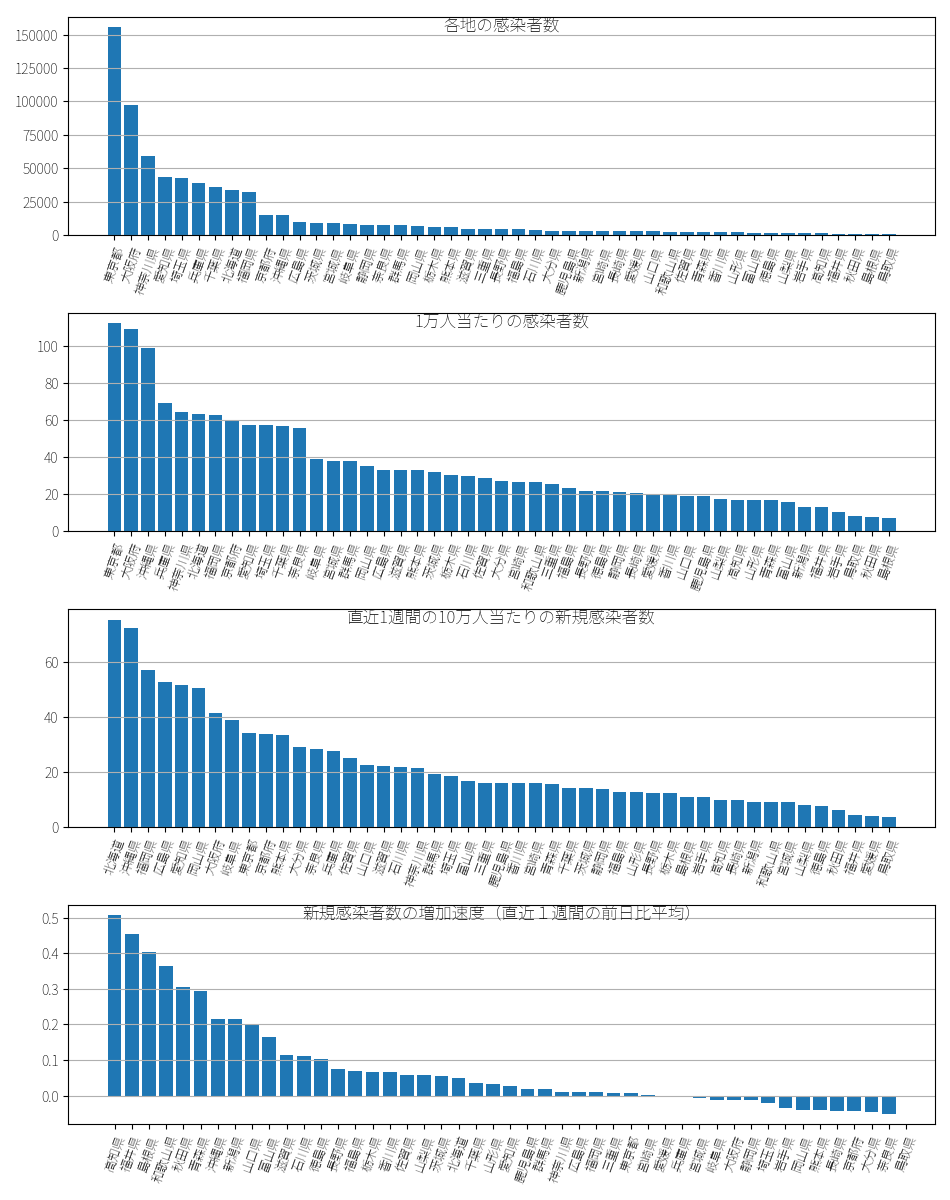

In [20]:
fig = plt.figure(figsize=(9.5,12))
plt.subplot(4,1,1) # (rows, columns, panel number)
plt.xticks(rotation="70",fontsize=9)
plt.grid(axis="y")
plt.bar(all_jp_desc["都道府県名"], all_jp_desc["各地の感染者数合計"])
plt.title("各地の感染者数", y=0.9)

plt.subplot(4,1,2) # (rows, columns, panel number)
plt.xticks(rotation="70",fontsize=9)
plt.grid(axis="y")
plt.bar(all_jp_desc_10k["都道府県名"], all_jp_desc_10k["１万人当たりの感染者数"])
plt.title("1万人当たりの感染者数",y=0.9)


plt.subplot(4,1,3) # (rows, columns, panel number)
plt.xticks(rotation="70",fontsize=9)
plt.grid(axis="y")
plt.bar(all_jp_desc_100k["都道府県名"], all_jp_desc_100k["直近1週間の10万人当たりの感染者数"])
plt.title("直近1週間の10万人当たりの新規感染者数",y=0.9)

### 新規感染者数の増加速度（直近１週間の前日比平均）
plt.subplot(4,1,4) # (rows, columns, panel number)
all_jp_v = all_jp.sort_values("直近1週間の新規感染者数前日比平均",ascending=False)
plt.xticks(rotation="70",fontsize=9)
plt.grid(axis="y")
plt.bar(all_jp_v["都道府県名"], all_jp_v["直近1週間の新規感染者数前日比平均"])
plt.title("新規感染者数の増加速度（直近１週間の前日比平均）",y=0.9)

fig.tight_layout()


## 度数分布表

In [21]:
import numpy as np
data = np.array(all_jp["各地の感染者数合計"])
 
# ヒストグラム
hist, bin_edges = np.histogram(data, bins=8)

print(hist)
print(bin_edges)

[38  4  2  1  1  0  0  1]
[   446.    19846.25  39246.5   58646.75  78047.    97447.25 116847.5
 136247.75 155648.  ]


## ヒストグラム

<IPython.core.display.Javascript object>


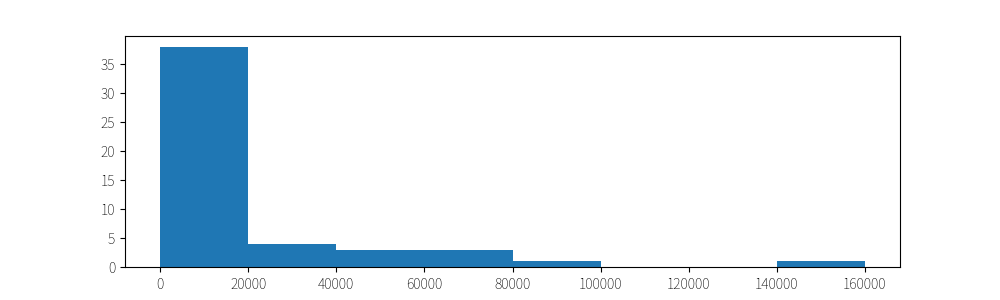

(array([38.,  4.,  3.,  1.,  0.,  0.,  1.]),
 array([     0,  20000,  40000,  80000, 100000, 120000, 140000, 160000]),
 <a list of 7 Patch objects>)

In [22]:
fig = plt.figure(figsize=(10,3))
plt.hist(all_jp_desc["各地の感染者数合計"],bins=[0,20000,40000,80000,100000,120000,140000,160000])

<IPython.core.display.Javascript object>


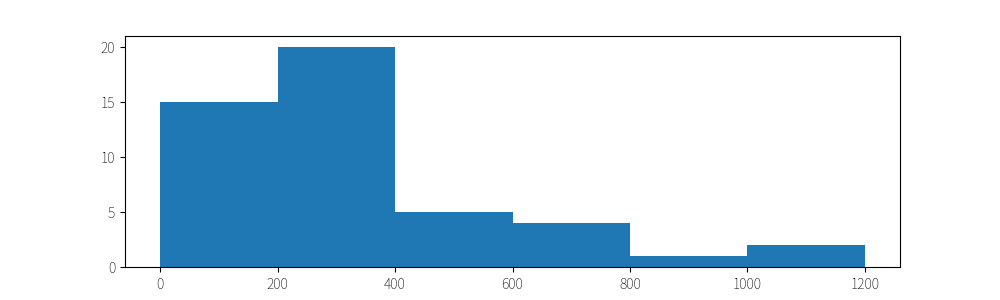

(array([15., 20.,  5.,  4.,  1.,  2.]),
 array([   0,  200,  400,  600,  800, 1000, 1200]),
 <a list of 6 Patch objects>)

In [23]:
fig = plt.figure(figsize=(10,3))
plt.hist(all_jp_desc["10万人当たりの感染者数"],bins=[0,200,400,600,800,1000,1200])
